# Linkfire Data Analytics Challenge Solution

## Task

The data set provided (`traffic.csv`) contains web traffic data (`"events"`) from a few different pages (`"links"`) over a period of 7 days including various categorical dimensions about the geographic origin of that traffic as well as a page's content: [`isrc`](https://isrc.ifpi.org/en/).

Our goal is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates. With that in mind, please analyze the data using the Python libraries Pandas and SciPy where indicated, providing answers to the presented questions.

### Exploratory Data Analysis

Before we begin to answer the questions, we are going to perform some preliminary analyses to get more familiar with the data. We will start by loading the required libraries. We'll use Pandas to create and analyse the data set and we will use Scipy to calculate some statistics. For some mathematical operations, the Numpy library may come in handy, as it is the most popular library in Python for linear algebra and various mathematical operations.

In [66]:
# import libraries
import pandas as pd
import numpy as np

from scipy import stats

We can use Pandas' [read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method to load the CSV data set into a Pandas Dataframe object. 

Pandas has many `read_*` methods for reading data from various sources, like Excel, HTML, JSON, SQL queries, etc., and converting it into a Dataframe object. The [documentation](https://pandas.pydata.org/docs/reference/io.html) on it is quite extensive.

In [67]:
# modify this to point to the downloaded CSV file
CSV_FILEPATH = "traffic.csv"
# load the data set
df = pd.read_csv(CSV_FILEPATH)

The shape and the 'head' of a DataFrame and the most basic methods that are always used whenever we are working with the Pandas library. The former prints the number of columns and rows in the data as a tuple, while the latter prints out the first `n` (5 by default) rows of the data set. We can use it to get a feeling about what the data actually looks like.

In [68]:
# (#columns, #rows)
df.shape

(226278, 9)

In [69]:
# printing the first five rows
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


We use the `describe()` method to print some desciptive statistics about each column. We can observe the number of non-null values in the `count` row, then the number of unique values, followed by the most frequent value and its count. Because all of our columns are of type `object`, as we can see in the output of the `info()` method in the next cell below, the descriptive statistics provide summary that is relevant to a categorical attribute. If, for example we were to have a numerical column, the `describe()` method would output different properties, like mean, max, min value, etc.

In [70]:
# print descriptive statistics about each column
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In the table above, the `count` presents the number of non-null values for a particular column in the data set, `unique` is the number of unique (different) values that we have, `top` is the most frequent value and `freq` is the count of the most frequent value. 

For example, for the column `event` we have `226278` non-null values, `3` unique values, the most frequent event is `pageview` with `142015` occurrences.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


The `info()` provides us with information about the size of the data set in terms of memory usage, the type of the columns and the Non-Null Count for each column.

### Question 1

**[Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?**

In the preliminary analysis, we observed that the _pageview_ event is the most frequent event in the data and that there are 3 types of events in the data (see the output of the 6th cell). 

To print each unique value of the `event` column, alongside a count of its occurrences, we can use the `value_counts()` method. The output for the _pageview_ events is `142,015`, so that is our total number of such events. Another solution for it would be to filter the data set to contain only the _pageview_ events, and then to read the number of rows in the filtered data set (second cell below).

In [72]:
# the data set records three types of events: pageview, click, preview
df["event"].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

In [73]:
# the total pageview events is the number of rows where 'event' = 'pageview'
df[df["event"] == "pageview"].shape[0]

142015

Getting the number of _pageview_ events per day requires the application of the [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) method. Internally, the method stores as many Dataframe objects as there are unique values in the column we are grouping by, with each such object having the same value for the grouping column. Almost always, a _groupby_ operation is followed by an aggregate function, like `sum`, `mean`, or `count`.

To put it in more simpler terms, and to answer the question, we need to _group_ the pageview events _by_ the _date_ and then _count_ their occurrence. This is achieved in the following cell.

In [74]:
# 1. filter only for 'pageview' events
# 2. group by the date
# 3. keep only the 'event' column, and specify a 'count' aggregation
df[df["event"] == "pageview"].groupby(by="date")["event"].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

The output here is actually a Pandas Series object (it is essentially a Dataframe with only one column). A series consists of two things: index and values. In our case, indices are the dates and the values are the counts of pageview events for that day. 

Please note that we allow for duplicates in the data, i.e., if the same user views the same page multiple times, it will be counted each time. We can use [`df.drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) to modify this behaviour and see the difference. The following cells illustrate the difference in the data caused after deduplicating: the number of events lowers by nearly half.

In [75]:
df_deduplicated = df.drop_duplicates()

In [76]:
df_deduplicated["event"].value_counts()

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64

In [77]:
df_deduplicated[df_deduplicated["event"] == "pageview"].shape[0]

73360

In [78]:
df_deduplicated[df_deduplicated["event"] == "pageview"].groupby(by="date")["event"].count()

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

### Question 2

**[Pandas] What about the other recorded events?**

Even though we know that there are only two other recorded events in our data, namely _click_ and _preview_, instead of hard-coding them in our solution, we are going to apply some set operations to provide a better approach that would generalize to other events as well. Data is constantly changing in the real world, and if were to add (or even remove)  an event from our data set the following solution would still work.

In the first line in the cell below we obtain the _set_ of all unique events in the data. Then, we remove the _pageview_ event because it was already analysed in the previous question. We will deal with whatever events remain.

In [79]:
# get the set of recorded events in the data
recorded_events = set(df["event"].unique())
# remove the 'pageview' event
recorded_events.remove("pageview")
recorded_events

{'click', 'preview'}

Once we have the _other recorded_ events, we can simply loop over them and apply the same solution from Question 1, adding some informative print statements in the process.

In [80]:
# loop over each event
for recorded_event in recorded_events:
    # get the total number of occurrences
    total_events = df[df["event"] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is", total_events, "\n")
    # group by the date and aggregate by count
    data_set = df[df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(recorded_event, "event distribution per day:\n")
    print(data_set, "\n")

Total number of click events is 55732 

click event distribution per day:

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 

Total number of preview events is 28531 

preview event distribution per day:

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 



### Question 3

**[Pandas] Which countries did the clicks come from?**

This question is a bit simpler than the ones before, in the sense that it does not require any groupings or aggregations. It is a common two-step solution: (1) filter for the proper data, (2) provide a summary of it:

1. We need to filter for the _click_ events only
2. We can print the unique values of the `Country` column (ignoring any nans)

In [81]:
# filter for the proper event
df_q3 = df[df["event"] == "click"]
# or alternatively, you can loop over the array provided by df.unique() and print them all
pd.DataFrame(data=df_q3["country"].dropna().unique(), columns=["Country"])

,Country
0,Saudi Arabia
1,India
2,France
3,Maldives
4,United States
...,...
197,Guernsey
198,Palau
199,Åland
200,Principality of Monaco


There are `202` countries where we have recorded _click_ events, while there are `211` unique countries in the entire data set, meaning that there are `9` countries where we have not recorded a click event. An obvious follow up question  would be to find out which are those `9` countries.

It can be answered with a simple set operation: we take the difference between the set of countries in the entire data set and the set of countries in the data set that we filtered here.

In [82]:
set(df["country"].unique()).difference(set(df_q3["country"].unique()))

{'Afghanistan',
 'Andorra',
 'Faroe Islands',
 'Guinea-Bissau',
 'Jersey',
 'Lesotho',
 'Macao',
 'Samoa',
 'Sint Maarten'}

### Question 4

**[Pandas] What was the overall click rate (clicks/pageviews)?**

Click rate is the number of clicks that a page has received (`event = 'click'`) divided by the number of times it has been shown (`event = 'pageview'`). It is a commonly used metric that measures the success of an advertising campaign.

Its calculation requires a few steps.

To start with, we can count the number of times each link has been clicked on, and the number of times each link has been viewed. Same procedure applies to both calculations. We first filter for the proper event (click or pageview), then we _group_ the filtered data _by_ the link Id, and count the occurrences of that event. 

In [83]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'pageview' events
pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
pageviews = pageviews.rename(columns={
    "event": "pageviews"
})

We rename the grouped column for easier manipulation, and reset the index of the Dataframe (the bold, left-most numbers; these will be important in the next step). To get a sense of what the data looks so far, we can print it with `head()`.

In [84]:
link_clicks.head()

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [85]:
pageviews.head()

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


To get the answer, we need to somehow join these two Dataframes on the same link Id, and then divide the number of clicks by the number of pageviews to get the required click rate. It can be achieved with Pandas' `merge()` method. We specify a 'left' and a 'right' Dataframe, a column to merge **_on_**, and how the merge should go (we specify 'inner' which takes the intersection of the two data sets).

In [86]:
# pd.merge() does a database-style join of the two dataframes
df_q4 = pd.merge(left=link_clicks, right=pageviews, on="linkid", how="inner")

In [87]:
# define a new column of the 'click_rate'
df_q4["click_rate"] = df_q4["clicks"] / df_q4["pageviews"]

Once we do the merge, we can do column-wise arithmetics to produce a new column that would store the click rate. The cell below prints the final data set, providing us with the click rate for each link.

In [88]:
df_q4

,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


### Question 5

**[Pandas] How does the clickrate distribute across different links?**

As mentioned in the beginning of this notebook, the `describe()` method provides different statistics for numeric and categorical columns. In the original data set we had only categorical columns, but in the data set generated in Question 4, we calculated some numerical columns, like number of clicks, pageviews and the click rate for each link.

To get a sense of the distribution of the clickrate across different links, we can use that same method. The cell below does that. Observe the output. We have the count (number of links), the mean, standard deviation, min, max, as well as the value of the click rate at the 25, 50, and 75th percentile.

In [89]:
df_q4["click_rate"].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click_rate, dtype: float64

Tabular data can only give us so much, and a picture says a thousand words, so whenever you can, use graphics to present your findings. In our case, we can do that, and in multiple ways. For instance, we can plot the distribution of the click rate as a histogram. 

Using the powerful [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method we plot a histogram with `100` bins. Notice how we provide parameters for the figure size and the label of the X-axis. It is always a good idea to have these as they provide a lot of context on first glance, and make the interpretation of the graphic a lot easier and quicker. Try to ignore or play around with these parameters and observe the output.

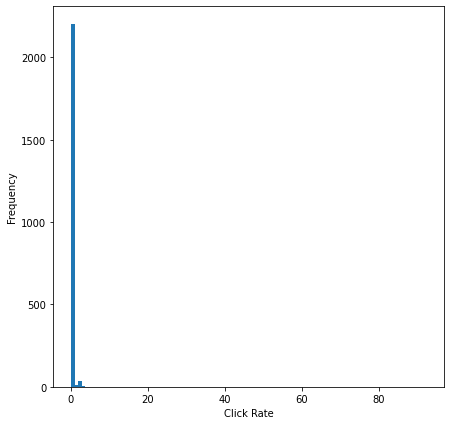

In [90]:
ax = df_q4["click_rate"].plot(kind="hist", figsize=(7, 7), bins=100)
_ = ax.set_xlabel("Click Rate")

The histogram shows that the data is highly skewed to left, i.e., many of its values are very close to zero. In such cases, a common workaround is to plot the histogram of the logarithm of the data. Let us try that, we can use Numpy's `log2()` method for it!

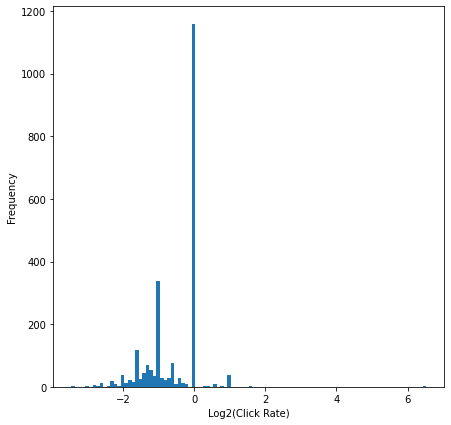

In [91]:
# because the data is highly skewed, it makes more sense to plot the log of it
df_q4["click_rate_log2"] = np.log2(df_q4["click_rate"])
ax = df_q4["click_rate_log2"].plot(kind="hist", figsize=(7, 7), bins=100)
_ = ax.set_xlabel("Log2(Click Rate)")

We observe an enormous spike at the `0` meaning that the actual click rate was `1`, implying that there are many links that have been viewed and clicked on exactly once. There are also, many links that have been viewed many times but clicked on fewer (values less than zero). Remember, this plots the logarithm of the actual values, so there is an extra math step in the interpretation here.

One last thing to try, is a box plot, which is basically a visualization of the `describe()` method.

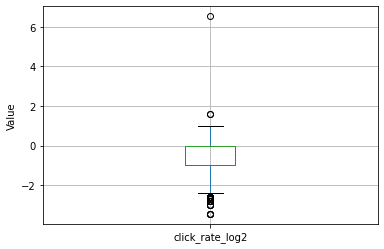

In [92]:
ax = df_q4.boxplot(column="click_rate_log2")
_ = ax.set_ylabel("Value")

We observe two (and one particular) high outliers, and many, many below the Q1 (i.e., click rate very close to zero). Our guess is that there are at least two links, that have been clicked on multiple times in the same page view.

### Question 6

**[Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.**

Pearson's correlation [coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a measure of linear correlation between two data sets. It takes its value in the range of `[-1, 1]` and the further it is from zero, the more significant the correlation is. If the value is negative, it means that the values in one set of the data decrease as the values in the other set increase. A positive correlation coefficicient implies that both sets of values move in the same direction, either they both increase or decrease.

Pearson's coefficient is implemented in both Pandas and Scipy, and here we are actually going to use both libraries, just to explore their APIs and to compare results! (should be the same).

First, let us filter the data to contain only the _click_ and the _preview_ events. We can describe it to get a sense of the contents.

In [93]:
# filter only events that are relevant to the question
df_q6 = df[df["event"].isin(["click", "preview"])]

In [94]:
df_q6.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,84263,84263,84261,84261,84252,84262,84262,82036,84263
unique,2,7,206,8137,1549,2003,2155,628,2286
top,click,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,55732,12995,18461,8893,15666,15666,15666,15666,15666


Now, we just repeat the same procedure as in Question 4. We create two new columns, and append them to the original data.

In [95]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'preview' events
previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={
    "event": "previews"
})

In [96]:
# perform two database-style joins to append the 
# number of link clicks and previews to each row
df_q6 = pd.merge(left=df_q6, right=link_clicks, how="left", on="linkid")
df_q6 = pd.merge(left=df_q6, right=previews, how="left", on="linkid")

The 'left' merge takes all rows from the 'left' dataframe and appends only the corresponding rows from the 'right' dataframe, leaving NaNs for the rest. We can use `dropna()` to drop rows that have NaNs for the clicks and previews columns.

In [97]:
df_q6.dropna(subset=["clicks", "previews"], inplace=True)
df_q6

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109.0,1605.0


Finally, we calculate the correlation coefficient with both _pandas_ and _scipy_.

In [98]:
df_q6.corr()

,clicks,previews
clicks,1.000000,0.998713
previews,0.998713,1.000000


In [99]:
stats.pearsonr(x=df_q6["clicks"], y=df_q6["previews"])

(0.9987125072008461, 0.0)

Almost perfectly positive correlation between the number of clicks and previews which seems logical; given that the one is actually dependent on the other (can't have clicks without previews and vise versa).

Using [pd.factorize()](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html) we can quantify the relationship between categorical variables in similar manner as with numerical variables.

In [100]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = df_q6[categorical_columns] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000


We observe high positive correlation between album, artist, and track and almost no correlation between other variables. This is again expected, since those variables are naturally dependent, i.e., each track belongs to an album and is performed by an artist.